In [14]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [15]:
# Load your dataset
df = pd.read_csv("descriptor.csv")  # Adjust path

In [16]:
df.head()

,MolWt,LogP,RotatableBonds,HDonors,HAcceptors,Prot_MW,Aromaticity,Instability,Hydropathy,Kd
0,541.461,5.10998,8,1,8,112902.2098,0.114804,50.310725,-0.242095,8.301030
1,602.022,4.67500,10,2,7,58194.7117,0.071429,52.925502,-0.512741,7.795880
2,228.247,2.97380,2,3,3,18402.3351,0.074534,33.732298,-0.610559,3.614394
3,386.412,-0.05948,5,5,10,70897.2343,0.063467,36.887492,-0.456037,6.530178
4,205.257,2.59470,5,0,3,56848.2407,0.113590,33.652941,-0.199189,5.886057


In [17]:
# Feature and target selection
features = ['MolWt', 'LogP', 'RotatableBonds', 'HDonors', 'HAcceptors',
            'Prot_MW', 'Aromaticity', 'Instability', 'Hydropathy']
target = 'Kd'

X = df[features]
y = df[target]

In [18]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0, random_state=42))
])

In [20]:
xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_val)

In [21]:
xgb_mse = mean_squared_error(y_val, xgb_preds)
print(f"Baseline XGBoost MSE: {xgb_mse:.4f}")

Baseline XGBoost MSE: 1.4993


In [22]:
joblib.dump(xgb_pipeline, "baseline_xgb_model.pkl")

['baseline_xgb_model.pkl']

In [23]:
test_df = pd.read_csv("descriptor_test.csv")
x_test = test_df.drop("Kd", axis=1)
y_test = test_df['Kd']

model = joblib.load("baseline_xgb_model.pkl")
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 1.5251
Mean Absolute Error: 0.9465
Root Mean Squared Error: 1.2349


C:\Users\NongNam\AppData\Local\Temp\ipykernel_18492\897430231.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_18492\897430231.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


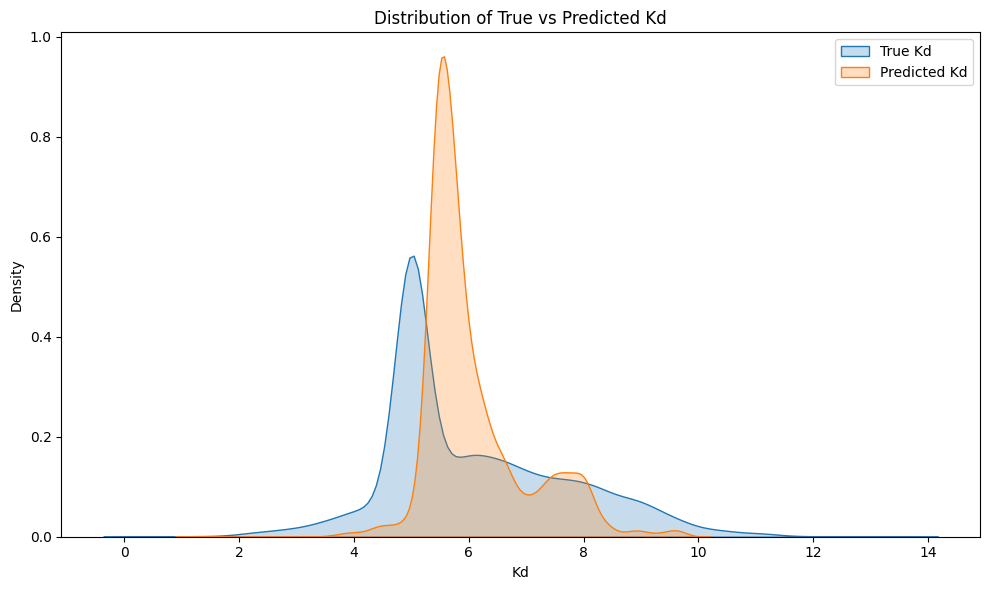

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()